# Project: Wrangling and Analyze Data

## Import Packages


In [1]:
import pandas as pd
import requests
import tweepy
import os
import json
from timeit import default_timer as timer
import numpy
import matplotlib.pyplot as plt
# import seaborn as sns

%matplotlib inline

In [2]:
DATA_PATH = 'data'

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
    

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:

twitter_archive_file= os.path.join(DATA_PATH, 'twitter-archive-enhanced.csv')

df_twitter_arch = pd.read_csv(twitter_archive_file)


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_prediction_resp = requests.get(image_predictions_url)

image_prediction_file = os.path.join(DATA_PATH, 'image_predictions.tsv')


with open(image_prediction_file, mode = 'wb') as file:
    file.write(img_prediction_resp.content)

df_img_prediction = pd.read_csv(image_prediction_file, sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
tweet_json = os.path.join(DATA_PATH, 'tweet_json.txt')

Connect to twitter API

In [5]:
CONSUMER_KEY=''
CONSUMER_SECRET=''
OAUTH_TOKEN=''
OAUTH_TOKEN_SECRET=''


auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

# Test connection 
tweet = api.get_status('666029285002620928')
print(tweet.text)

This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI


Fetch data from twitter for each tweet id

In [6]:
tweet_ids = df_twitter_arch['tweet_id'].values

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file



with open('tweet_json', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Fail
1045: 743609206067040256
Fail
1046: 743595368194129920
Fail
1047: 743545585370791937
Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078:

Success
1316: 706681918348251136
Success
1317: 706644897839910912
Success
1318: 706593038911545345
Success
1319: 706538006853918722
Success
1320: 706516534877929472
Success
1321: 706346369204748288
Success
1322: 706310011488698368
Success
1323: 706291001778950144
Success
1324: 706265994973601792
Success
1325: 706169069255446529
Success
1326: 706166467411222528
Success
1327: 706153300320784384
Success
1328: 705975130514706432
Success
1329: 705970349788291072
Success
1330: 705898680587526145
Success
1331: 705786532653883392
Success
1332: 705591895322394625
Success
1333: 705475953783398401
Success
1334: 705442520700944385
Success
1335: 705428427625635840
Success
1336: 705239209544720384
Success
1337: 705223444686888960
Success
1338: 705102439679201280
Success
1339: 705066031337840642
Success
1340: 704871453724954624
Success
1341: 704859558691414016
Success
1342: 704847917308362754
Success
1343: 704819833553219584
Success
1344: 704761120771465216
Success
1345: 704499785726889984
Success
13

Success
1565: 688116655151435777
Success
1566: 688064179421470721
Success
1567: 687841446767013888
Success
1568: 687826841265172480
Success
1569: 687818504314159109
Success
1570: 687807801670897665
Success
1571: 687732144991551489
Success
1572: 687704180304273409
Success
1573: 687664829264453632
Success
1574: 687494652870668288
Success
1575: 687480748861947905
Success
1576: 687476254459715584
Success
1577: 687460506001633280
Success
1578: 687399393394311168
Success
1579: 687317306314240000
Success
1580: 687312378585812992
Success
1581: 687127927494963200
Success
1582: 687124485711986689
Success
1583: 687109925361856513
Success
1584: 687102708889812993
Success
1585: 687096057537363968
Success
1586: 686947101016735744
Success
1587: 686760001961103360
Success
1588: 686749460672679938
Success
1589: 686730991906516992
Success
1590: 686683045143953408
Success
1591: 686618349602762752
Success
1592: 686606069955735556
Success
1593: 686394059078897668
Success
1594: 686386521809772549
Success
15

Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833: 676191832485810177
Success
1834: 676146341966438401
Success
1835: 676121918416756736
Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
1838: 676089483918516224
Success
1839: 675898130735476737
Success
1840: 675891555769696257
Success
1841: 675888385639251968
Success
1842: 675878199931371520
Success
1843: 675870721063669760
Success
18

Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
2082: 670822709593571328
Success
2083: 670815497391357952
Success
2084: 670811965569282048
Success
2085: 670807719151067136
Success
2086: 670804601705242624
Success
2087: 670803562457407488
Success
2088: 670797304698376195
Success
2089: 670792680469889025
Success
2090: 670789397210615808
Success
2091: 670786190031921152
Success
2092: 670783437142401025
Success
20

Fail
2324: 666428276349472768
Fail
2325: 666421158376562688
Fail
2326: 666418789513326592
Fail
2327: 666411507551481857
Fail
2328: 666407126856765440
Fail
2329: 666396247373291520
Fail
2330: 666373753744588802
Fail
2331: 666362758909284353
Fail
2332: 666353288456101888
Fail
2333: 666345417576210432
Fail
2334: 666337882303524864
Fail
2335: 666293911632134144
Fail
2336: 666287406224695296
Fail
2337: 666273097616637952
Fail
2338: 666268910803644416
Fail
2339: 666104133288665088
Fail
2340: 666102155909144576
Fail
2341: 666099513787052032
Fail
2342: 666094000022159362
Fail
2343: 666082916733198337
Fail
2344: 666073100786774016
Fail
2345: 666071193221509120
Fail
2346: 666063827256086533
Fail
2347: 666058600524156928
Fail
2348: 666057090499244032
Fail
2349: 666055525042405380
Fail
2350: 666051853826850816
Fail
2351: 666050758794694657
Fail
2352: 666049248165822465
Fail
2353: 666044226329800704
Fail
2354: 666033412701032449
Fail
2355: 666029285002620928
Fail
2356: 666020888022790149
Fail
1576.

Read JSON data

In [9]:
json_tweets = pd.read_json(tweet_json, lines=True)

# Remove unnecessary columns
json_tweets = json_tweets[['created_at', 'id','display_text_range', 'retweet_count', 'favorite_count','favorited','lang']]

## Assessing Data


### Visual Assessment

In [10]:
df_twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
json_tweets.head()

,created_at,id,display_text_range,retweet_count,favorite_count,favorited,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,"[0, 85]",8853,39467,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,"[0, 138]",6514,33819,False,en
2,2017-07-31 00:18:03+00:00,891815181378084864,"[0, 121]",4328,25461,False,en
3,2017-07-30 15:58:51+00:00,891689557279858688,"[0, 79]",8964,42908,False,en
4,2017-07-29 16:00:24+00:00,891327558926688256,"[0, 138]",9774,41048,False,en


### Programatic Assessment

In [13]:
df_twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1759,678740035362037760,NaN,NaN,2015-12-21 00:53:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tango. He's a large dog. Doesn't care muc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678740035...,6,10,Tango,None,None,None,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,363890752.0,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,None,None,None
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131...,12,10,None,None,None,None,None


In [14]:
df_img_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True
632,680959110691590145,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,2,carousel,0.500992,False,feather_boa,0.064390,False,pug,0.044357,True
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053,True,washbasin,0.006321,False,tub,0.006243,False
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False


In [15]:
json_tweets.sample(5)

,created_at,id,display_text_range,retweet_count,favorite_count,favorited,lang
499,2016-12-25 20:00:07+00:00,813112105746448384,"[0, 100]",3225,11515,False,en
1727,2015-12-24 03:12:15+00:00,679862121895714818,"[0, 73]",706,2678,False,en
1569,2016-01-14 18:33:48+00:00,687704180304273409,"[0, 105]",950,2660,False,en
2212,2015-11-22 21:41:02+00:00,668544745690562560,"[0, 140]",250,561,False,en
1530,2016-01-21 02:56:40+00:00,690005060500217858,"[0, 90]",1907,4004,False,en


In [16]:
df_twitter_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [17]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
df_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2354 non-null   datetime64[ns, UTC]
 1   id                  2354 non-null   int64              
 2   display_text_range  2354 non-null   object             
 3   retweet_count       2354 non-null   int64              
 4   favorite_count      2354 non-null   int64              
 5   favorited           2354 non-null   bool               
 6   lang                2354 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 112.8+ KB


In [20]:
df_twitter_arch[df_twitter_arch.duplicated() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality issues

1. `df_img_prediction` remove underscore on dog prediction names columns [p1, p2 and p3]

2. `df_img_prediction` Capitalize the first character on dog prediction names columns [p1, p2 and p3]

3. Use mean rate to recalculate `rating_numerator` when value is greater than 15

4. `df_img_prediction` and `df_twitter_arch` change `tweet_id` datatype from int to string also `id` in `json_tweets`

5. `df_twitter_arch` change [`timestamp`, `retweeted_status_timestamp`] datatype from string to datetime

6.  `df_twitter_arch` denominator having values greater than 10. Denominator should always be 10.

7. Rename `json_tweets.id` to `json_tweets.tweet_id` to be same to other 2 tables

8. Remove tweets that are Retweets and replies


### Tidiness issues
1. `json_tweets` extract source text from source url

2. Combine all three tables into one table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data

df_img_prediction_cp = df_img_prediction.copy()
json_tweets_cp = json_tweets.copy()
df_twitter_arch_cp = df_twitter_arch.copy()


### Issue #1:

#### Define:

Remove underscore(_) on dog prediction names columns [p1, p2 and p3]

#### Code

In [22]:
df_img_prediction_cp['p1'] = df_img_prediction_cp['p1'].str.replace('_', ' ')
df_img_prediction_cp['p2'] = df_img_prediction_cp['p2'].str.replace('_', ' ')
df_img_prediction_cp['p3'] = df_img_prediction_cp['p3'].str.replace('_', ' ')

#### Test

In [23]:
df_img_prediction_cp.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #2:

#### Define

Capitilize the first character on dog prediction names columns [p1, p2 and p3]

#### Code

In [24]:
df_img_prediction_cp['p1'] = df_img_prediction_cp['p1'].str.capitalize()
df_img_prediction_cp['p2'] = df_img_prediction_cp['p2'].str.capitalize()
df_img_prediction_cp['p3'] = df_img_prediction_cp['p3'].str.capitalize()


#### Test

In [25]:
df_img_prediction_cp.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #3:

#### Define

Use mean rate to recalculate `rating_numerator` when value is greater than 15

#### Code

In [26]:

mean_numerator = round(df_twitter_arch_cp[df_twitter_arch_cp.rating_numerator <= 15].rating_numerator.mean())

df_twitter_arch_cp.replace(df_twitter_arch_cp[df_twitter_arch_cp.rating_numerator > 15].rating_numerator.values, mean_numerator, inplace=True)

#### Test

In [27]:
df_twitter_arch_cp[df_twitter_arch_cp.rating_numerator > 15].rating_numerator.sum()

0

### Issue #4:

#### Define
`df_img_prediction` and `df_twitter_arch` change `tweet_id` datatype from int to string 

#### Code

In [28]:
df_img_prediction_cp.tweet_id = df_img_prediction_cp.tweet_id.astype('str')
df_twitter_arch_cp.tweet_id = df_twitter_arch_cp.tweet_id.astype('str')
json_tweets_cp.id = json_tweets_cp.id.astype('str')

#### Test

In [29]:
print(df_img_prediction_cp.tweet_id.dtype)
print(json_tweets_cp.id.dtype)
df_twitter_arch_cp.tweet_id.dtype

object
object


dtype('O')

### Issue #5:

#### Define
df_twitter_arch change [timestamp, retweeted_status_timestamp] datatype from string to datetime

#### Code

In [30]:
df_twitter_arch_cp['timestamp'] = df_twitter_arch_cp['timestamp'].astype('datetime64')
df_twitter_arch_cp['retweeted_status_timestamp'] = df_twitter_arch_cp['retweeted_status_timestamp'].astype('datetime64')

#### Test

In [31]:
print(df_twitter_arch_cp['timestamp'].dtype)
df_twitter_arch_cp['retweeted_status_timestamp'].dtype

datetime64[ns]


dtype('<M8[ns]')

### Issue #6:

#### Define
`df_twitter_arch` denominator having values greater than 10. Denominator should always be 10.

#### Code

In [32]:
df_twitter_arch_cp.replace(df_twitter_arch_cp[df_twitter_arch_cp.rating_denominator != 10].rating_denominator.values, 10, inplace=True)

#### Test

In [33]:
df_twitter_arch_cp[df_twitter_arch_cp.rating_denominator != 10].rating_denominator.value_counts().sum()

0

### Issue #7:

#### Define
Rename json_tweets.id to json_tweets.tweet_id to be same to other 2 tables

#### Code

In [34]:
json_tweets_cp.rename(columns={'id': 'tweet_id'}, inplace=True )

#### Test

In [35]:
json_tweets_cp.head()

,created_at,tweet_id,display_text_range,retweet_count,favorite_count,favorited,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,"[0, 85]",8853,39467,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,"[0, 138]",6514,33819,False,en
2,2017-07-31 00:18:03+00:00,891815181378084864,"[0, 121]",4328,25461,False,en
3,2017-07-30 15:58:51+00:00,891689557279858688,"[0, 79]",8964,42908,False,en
4,2017-07-29 16:00:24+00:00,891327558926688256,"[0, 138]",9774,41048,False,en


### Issue #8:

#### Define
Remove tweets that are Retweets and replies

#### Code

In [36]:

idx = df_twitter_arch_cp[df_twitter_arch_cp['retweeted_status_id'].isnull() == False].index.to_list()

df_twitter_arch_cp.drop(df_twitter_arch_cp.index[idx], inplace=True)
df_twitter_arch_cp.reset_index(inplace=True)


idx2 = df_twitter_arch_cp[df_twitter_arch_cp['in_reply_to_status_id'].isnull() == False].index.to_list()
df_twitter_arch_cp.drop(df_twitter_arch_cp.index[idx2], inplace=True)
df_twitter_arch_cp.reset_index(inplace=True)
df_twitter_arch_cp.drop(columns=['level_0', 'index'], inplace=True)


#### Test

In [37]:
df_twitter_arch_cp[df_twitter_arch_cp['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [38]:
df_twitter_arch_cp[df_twitter_arch_cp['in_reply_to_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #9

#### Define

Extract source from source URL `a href` tag

#### Code

In [39]:
anchr_text_expr = r'<a\s[^>]*>([^<]*)</a>|\b(\w+://[^<>\'"\t\r\n\xc2\xa0]*[^<>\'"\t\r\n\xc2\xa0 .,()])'

df_twitter_arch_cp.source = df_twitter_arch_cp.source.str.extract(anchr_text_expr, expand=True)[0]

#### Test

In [40]:
df_twitter_arch_cp.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #10

#### Define
    Combine data into one dataframe

#### Code

In [41]:
twitter_archive_master = pd.merge(
    df_twitter_arch_cp,
    df_img_prediction_cp,
    how='inner',
    on='tweet_id'
)

In [42]:
twitter_archive_master = pd.merge(
    twitter_archive_master,
    json_tweets_cp,
    how='inner',
    on='tweet_id'
)

#### Test

In [43]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,created_at,display_text_range,retweet_count,favorite_count,favorited,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,Banana,0.076110,False,2017-08-01 16:23:56+00:00,"[0, 85]",8853,39467,False,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,Papillon,0.068957,True,2017-08-01 00:17:27+00:00,"[0, 138]",6514,33819,False,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,Kelpie,0.031379,True,2017-07-31 00:18:03+00:00,"[0, 121]",4328,25461,False,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,True,Spatula,0.040836,False,2017-07-30 15:58:51+00:00,"[0, 79]",8964,42908,False,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,German short-haired pointer,0.175219,True,2017-07-29 16:00:24+00:00,"[0, 138]",9774,41048,False,en


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [44]:
master_file = os.path.join(DATA_PATH, 'twitter_archive_master.csv')
twitter_archive_master.to_csv(master_file)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [45]:
# Read Saved Master file
twitter_archive_master = pd.read_csv(master_file)

twitter_archive_master.rating_numerator.describe()

count    1971.000000
mean       10.444444
std         2.012482
min         1.000000
25%        10.000000
50%        10.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [46]:
twitter_archive_master.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

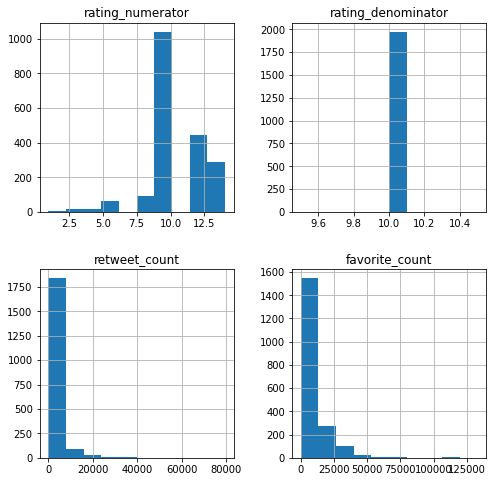

In [47]:
twitter_archive_master[['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count' ]].hist(figsize=(8,8));

### Insights:
1. Which channel do we get highest retweet and favorite count ?

2. What percentage of tweets go viral ?

3. What are favorite dog names ?

### Visualization

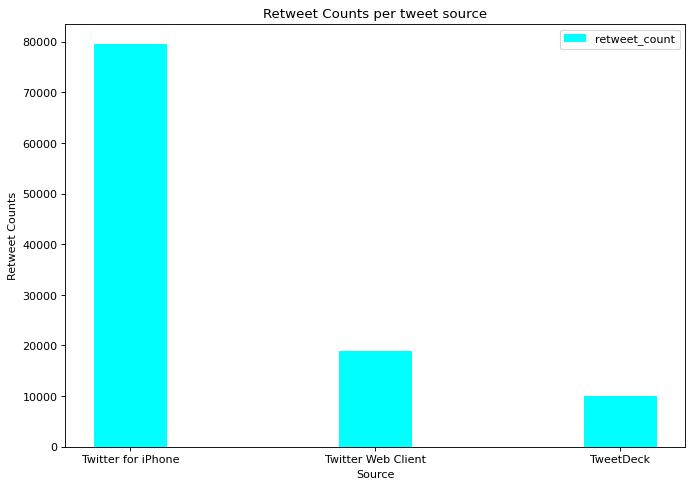

In [48]:
x = twitter_archive_master['source']
y1 = twitter_archive_master['retweet_count']

plt.figure(figsize=(10, 7), dpi=80)

plt.bar(x, y1, color='cyan', width=0.3)

plt.xlabel('Source')
plt.ylabel('Retweet Counts')
plt.legend(['retweet_count'])
plt.title('Retweet Counts per tweet source')

plt.show()

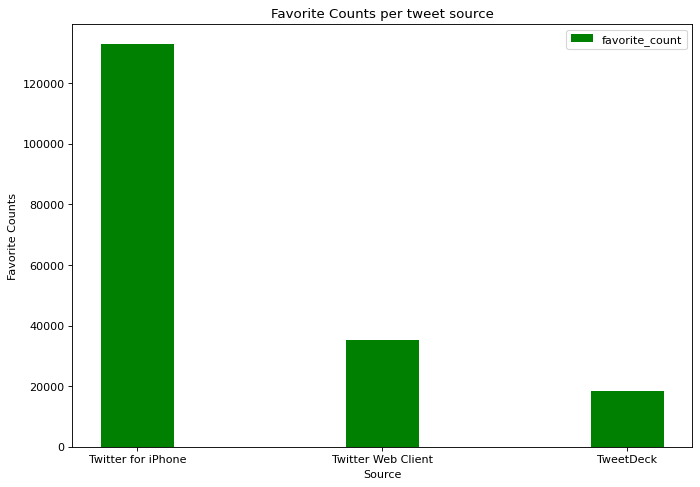

In [49]:
x = twitter_archive_master['source']
y1 = twitter_archive_master['favorite_count']

plt.figure(figsize=(10, 7), dpi=80)

plt.bar(x, y1, color='green', width=0.3)

plt.xlabel('Source')
plt.ylabel('Favorite Counts')
plt.legend(['favorite_count'])
plt.title('Favorite Counts per tweet source')

plt.show()

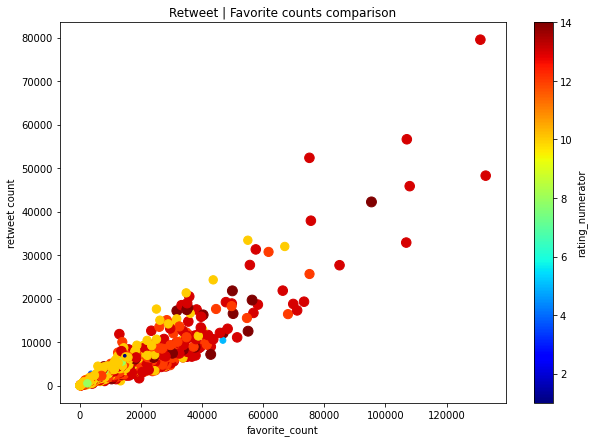

In [50]:
ax = twitter_archive_master.plot(x='favorite_count', y='retweet_count', sharex=False,
            kind='scatter', s=twitter_archive_master.rating_numerator*7, figsize=(10,7), c='rating_numerator', cmap=plt.get_cmap('jet'),
            xlabel='favorite_count', ylabel='retweet count', title='Retweet | Favorite counts comparison');

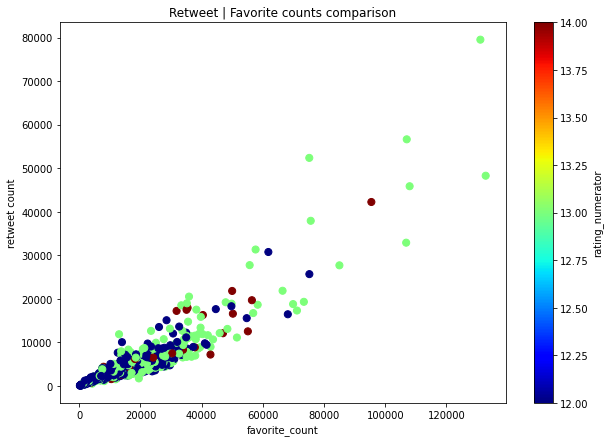

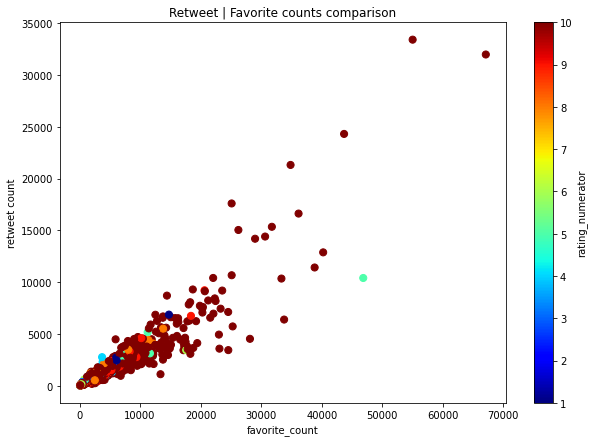

In [51]:
ax = twitter_archive_master[twitter_archive_master.rating_numerator > 10].plot(x='favorite_count', y='retweet_count', sharex=False,
            kind='scatter', s=50, figsize=(10,7), c='rating_numerator', cmap=plt.get_cmap('jet'),
            xlabel='favorite_count', ylabel='retweet count', title='Retweet | Favorite counts comparison');

ax = twitter_archive_master[twitter_archive_master.rating_numerator <= 10].plot(x='favorite_count', y='retweet_count', sharex=False,
            kind='scatter', s=50, figsize=(10,7), c='rating_numerator', cmap=plt.get_cmap('jet'),
            xlabel='favorite_count', ylabel='retweet count', title='Retweet | Favorite counts comparison');

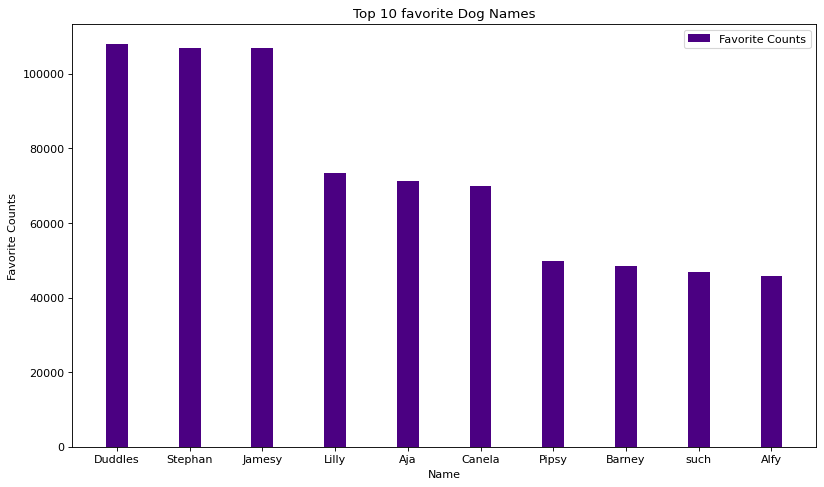

In [52]:
top_10_favorite_dog_names = twitter_archive_master.groupby('name', as_index=False)['favorite_count'].mean().sort_values(by='favorite_count', ascending=False).head(10)

x = top_10_favorite_dog_names['name']
y = top_10_favorite_dog_names['favorite_count']

plt.figure(figsize=(12, 7), dpi=80)

plt.bar(x, y, color='indigo', width=0.3)

plt.xlabel('Name')
plt.ylabel('Favorite Counts')
plt.legend(['Favorite Counts'])
plt.title('Top 10 favorite Dog Names')

plt.show()

In [53]:
top_10_favorite_dog_names

,name,favorite_count
259,Duddles,107956.0
800,Stephan,107015.0
400,Jamesy,106827.0
512,Lilly,73397.0
5,Aja,71144.0
145,Canela,69871.0
669,Pipsy,49720.0
54,Barney,48410.0
930,such,46959.0
16,Alfy,45880.0
